## Chasing Speed: Why Non-Elite Marathon Times Remain Stagnant Despite Running Tech Advancements

##### As a keen runner and technophile, I am keen to analyse running data to confirm if the average non-elite runner is seeing faster finishing times when comparing past and present dataset. 
##### As time goes on we see more technologically advanced trainers, technology (watches, digital training plans) and educational tips/nutritional information, but is all the investment into these gadgets and illuminous feather light trainers really making a difference, or is clever marketing getting the better of us?

![London Marathon](https://images.ctfassets.net/7ajcefednbt4/68o2Cx7UXvJ9Zi0kyqBpaq/9f4cd99e8fdc7cc22b1d2a217876009e/London_Marathon_header.jpg?fm=webp&w=2560)



## Loading/Cleaning data

Checking for null values in most important columns  
Changing half and finish times to minutes  
Checking number of runners per file and average number of runners overall  

In [819]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [821]:
import pandas as pd
import os

# Folder path
folder_path = "/Users/craigobee/Library/CloudStorage/OneDrive-HenryScheinONE/BPP Data Science/Professional Practice Assessment/London Marathon/Python/"

# List of specific files
files_to_load = [
    "London_2014_mass_results.csv",
    "London_2015_mass_results.csv",
    "London_2016_mass_results.csv",
    "London_2017_mass_results.csv",
    "London_2018_mass_results.csv",
    "London_2019_mass_results.csv",
    "London_2021_mass_results.csv",
    "London_2022_mass_results.csv"
]

# Load and combine
dataframes = []

for filename in files_to_load:
    file_path = os.path.join(folder_path, filename)
    year = int(filename.split("_")[1])
    
    try:
        df_year = pd.read_csv(
            file_path,
            encoding="utf-8",
            dtype={"Finish Time": str, "Half Time": str}
        )
    except UnicodeDecodeError:
        print(f"⚠️ UTF-8 failed for {filename}, trying ISO-8859-1...")
        df_year = pd.read_csv(
            file_path,
            encoding="ISO-8859-1",
            dtype={"Finish Time": str, "Half Time": str}
        )
    
    df_year["Year"] = year
    dataframes.append(df_year)

# Combine into one DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Convert time columns to timedelta (hh:mm:ss format)
df["Finish Time"] = pd.to_timedelta(df["Finish Time"], errors="coerce")
df["Half Time"] = pd.to_timedelta(df["Half Time"], errors="coerce")

# Final check
#print(f"✅ Loaded {len(df)} total rows from {len(dataframes)} files")
#print("Missing Finish Times:", df["Finish Time"].isnull().sum())
#df.head()

# Check for null or blank values in 'Finish Time' and 'Year'
null_or_blank = df[['Finish Time', 'Year']].apply(
    lambda col: col.isnull() | (col.astype(str).str.strip() == '')
)

# Print rows that have issues
print("Rows with null or blank values:")
print(df[null_or_blank.any(axis=1)])

# Or just check counts
print("\nNull/Blank Count:")
print(null_or_blank.sum())

⚠️ UTF-8 failed for London_2015_mass_results.csv, trying ISO-8859-1...
Rows with null or blank values:
Empty DataFrame
Columns: [Overall Place, Gender Place, Category Place, Name, Club, Runner Number, Gender, Category, Half Time, Finish Time, Year]
Index: []

Null/Blank Count:
Finish Time    0
Year           0
dtype: int64


In [822]:
# Count missing (NaN) Gender values
missing_gender_nan = df_filtered["Gender"].isna().sum()

# Count blank strings (e.g. "", " ", etc.)
missing_gender_blank = (df_filtered["Gender"].astype(str).str.strip() == "").sum()

# Total missing or blank Gender values
total_missing = missing_gender_nan + missing_gender_blank

print(f"Missing Gender values (NaN): {missing_gender_nan}")
print(f"Blank or whitespace Gender values: {missing_gender_blank}")
print(f"Total rows with missing or blank Gender: {total_missing}")

# Optional: confirm
if total_missing == 0:
    print("✅ Gender column is fully populated across all data files.")
else:
    print("⚠️ Gender column has missing or blank values.")


Missing Gender values (NaN): 0
Blank or whitespace Gender values: 0
Total rows with missing or blank Gender: 0
✅ Gender column is fully populated across all data files.


In [815]:
# Folder containing your files
folder_path = "/Users/craigobee/Library/CloudStorage/OneDrive-HenryScheinONE/BPP Data Science/Professional Practice Assessment/London Marathon/Python/"

# List of filenames
files_to_check = [
    "London_2014_mass_results.csv",
    "London_2015_mass_results.csv",
    "London_2016_mass_results.csv",
    "London_2017_mass_results.csv",
    "London_2018_mass_results.csv",
    "London_2019_mass_results.csv",
    "London_2021_mass_results.csv",
    "London_2022_mass_results.csv"
]

# Track totals
total_runners = 0
file_counts = []

for filename in files_to_check:
    file_path = os.path.join(folder_path, filename)
    try:
        df = pd.read_csv(file_path, encoding="utf-8")
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding="ISO-8859-1")
    
    count = len(df)
    file_counts.append(count)
    print(f"{filename}: {count} runners")

# Calculate the average
average_runners = sum(file_counts) / len(file_counts)
print(f"\n📊 Average number of runners per year: {average_runners:,.0f}")


London_2014_mass_results.csv: 35880 runners
London_2015_mass_results.csv: 37597 runners
London_2016_mass_results.csv: 38939 runners
London_2017_mass_results.csv: 39282 runners
London_2018_mass_results.csv: 40096 runners
London_2019_mass_results.csv: 42561 runners
London_2021_mass_results.csv: 35889 runners
London_2022_mass_results.csv: 40618 runners

📊 Average number of runners per year: 38,858


In [825]:
# Group by year and calculate mean, median, and std of finish times
yearly_stats = df.groupby("Year")["Finish Time"].agg(["mean", "median", "std"]).reset_index()

In [827]:
# Convert finish times to minutes
yearly_stats["mean_minutes"] = yearly_stats["mean"].dt.total_seconds() / 60
yearly_stats["median_minutes"] = yearly_stats["median"].dt.total_seconds() / 60
yearly_stats["std_minutes"] = yearly_stats["std"].dt.total_seconds() / 60


## Test & Train Set

This shows the data is near identical when using a randomised train and test set,  
meaning we're unlikely to get any unexpected results when comparing groups of data.

In [830]:
from sklearn.model_selection import train_test_split

# Drop rows with missing finish time just in case
df_cleaned = df_filtered.dropna(subset=["Finish Time"])

# Perform the split (80% train, 20% test)
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Check size
print(f"Train set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")


Train set: 32478 rows
Test set: 8120 rows


In [832]:
from sklearn.model_selection import train_test_split

# Drop rows with missing finish times
df_cleaned = df_filtered.dropna(subset=["Finish Time"])

# Split the data (e.g. 80% train, 20% test)
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Add a label to each
train_df["Set"] = "Train"
test_df["Set"] = "Test"

# Combine them back together
combined_sets = pd.concat([train_df, test_df], ignore_index=True)


In [836]:
# Step 1: Convert Finish Time to timedelta (if not already)
combined_sets["Finish Time"] = pd.to_timedelta(combined_sets["Finish Time"], errors="coerce")

# Step 2: Convert to minutes
combined_sets["Finish_Minutes"] = combined_sets["Finish Time"].dt.total_seconds() / 60

# Step 3: Group by Year and Set
avg_by_year_set = combined_sets.groupby(["Year", "Set"])["Finish_Minutes"].mean().reset_index()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(data=avg_by_year_set, x="Year", y="Finish_Minutes", hue="Set", marker="o")

plt.title("Average Finish Time per Year by Train/Test Set (Random Split)")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


## Average finish time by gender

The results show a quite stagnant result over time when comparing all runners

In [838]:
# Group by Year and Gender
gender_stats = df.groupby(["Year", "Gender"])["Finish Time"].agg(["mean", "median", "std"]).reset_index()

# Convert to minutes
gender_stats["mean_minutes"] = gender_stats["mean"].dt.total_seconds() / 60
gender_stats["median_minutes"] = gender_stats["median"].dt.total_seconds() / 60
gender_stats["std_minutes"] = gender_stats["std"].dt.total_seconds() / 60


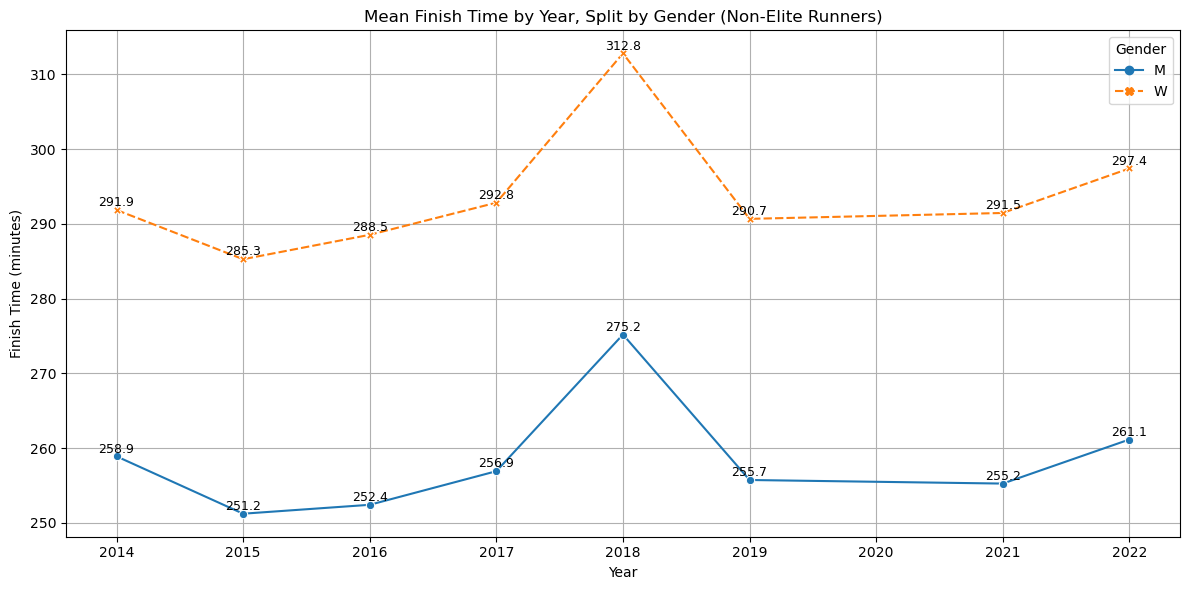

In [842]:
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(
    data=gender_stats,
    x="Year",
    y="mean_minutes",
    hue="Gender",
    style="Gender",
    markers=True
)

# Add value labels to each point
for _, row in gender_stats.iterrows():
    plt.text(
        row["Year"],
        row["mean_minutes"] + 0.5,  # slightly above the point
        f"{row['mean_minutes']:.1f}",
        ha="center",
        fontsize=9
    )

plt.title("Mean Finish Time by Year, Split by Gender (Non-Elite Runners)")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

## Average finish time per year per age category

Similar to the gender results, we see a similar stagnant result over time when including at all runners

In [844]:
# Group by Year and Age Category
age_stats = df.groupby(["Year", "Category"])["Finish Time"].agg(["mean", "median", "std"]).reset_index()

# Convert times to minutes
age_stats["mean_minutes"] = age_stats["mean"].dt.total_seconds() / 60
age_stats["median_minutes"] = age_stats["median"].dt.total_seconds() / 60
age_stats["std_minutes"] = age_stats["std"].dt.total_seconds() / 60


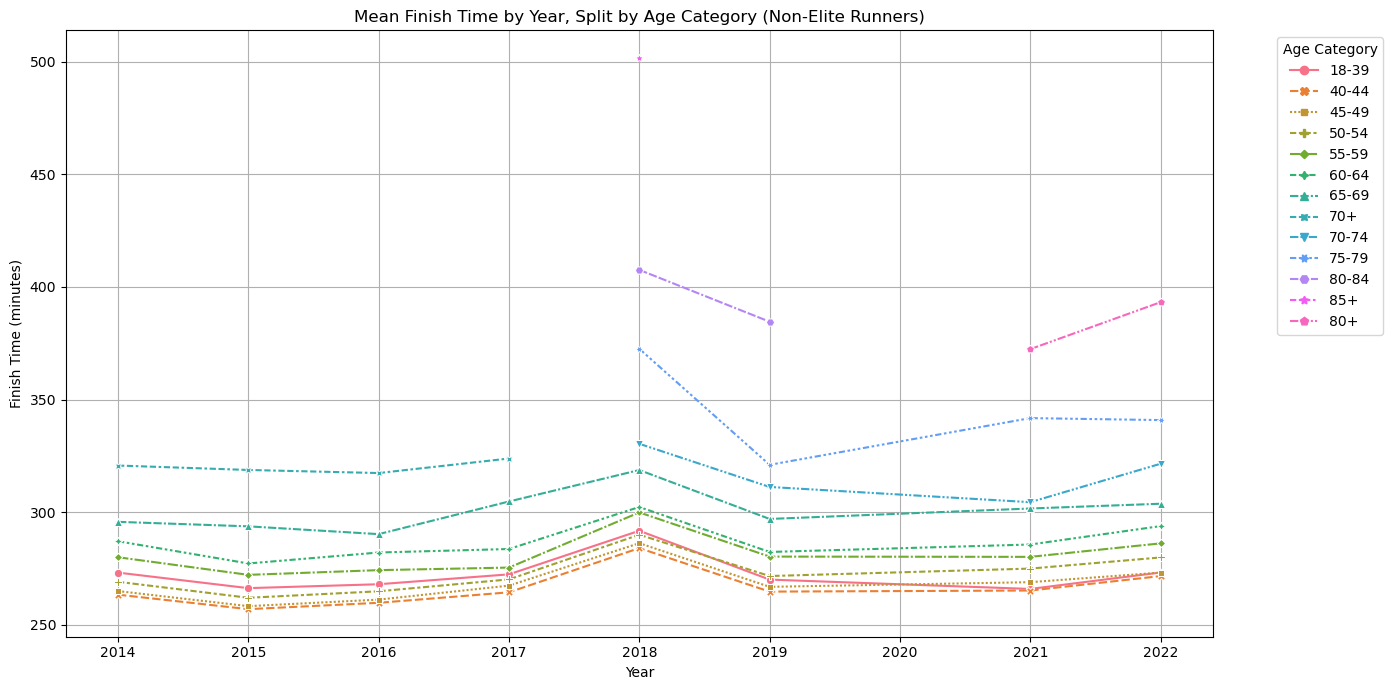

In [846]:
plt.figure(figsize=(14, 7))

# Lineplot split by Category (Age Group)
sns.lineplot(
    data=age_stats,
    x="Year",
    y="mean_minutes",
    hue="Category",
    style="Category",
    markers=True
)

plt.title("Mean Finish Time by Year, Split by Age Category (Non-Elite Runners)")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Year")
plt.legend(title="Age Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


In [848]:
# Only keep rows with valid finish times (e.g. under 10 hours)
df = df[df["Finish Time"].dt.total_seconds() < 10 * 60 * 60]


In [850]:
# Now list clean, unique categories
categories = df["Category"].dropna().astype(str).unique()
print(sorted(categories))


['18-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70+', '70-74', '75-79', '80+', '80-84', '85+']


In [852]:
# Exclude unwanted age categories
excluded_categories = ["80+", "85+", "80-84"]
df_filtered = df[~df["Category"].isin(excluded_categories)]


In [854]:
# Group by year and age category, calculate stats
age_stats = df_filtered.groupby(["Year", "Category"])["Finish Time"].agg(["mean", "median", "std"]).reset_index()

# Convert times to minutes
age_stats["mean_minutes"] = age_stats["mean"].dt.total_seconds() / 60
age_stats["median_minutes"] = age_stats["median"].dt.total_seconds() / 60
age_stats["std_minutes"] = age_stats["std"].dt.total_seconds() / 60


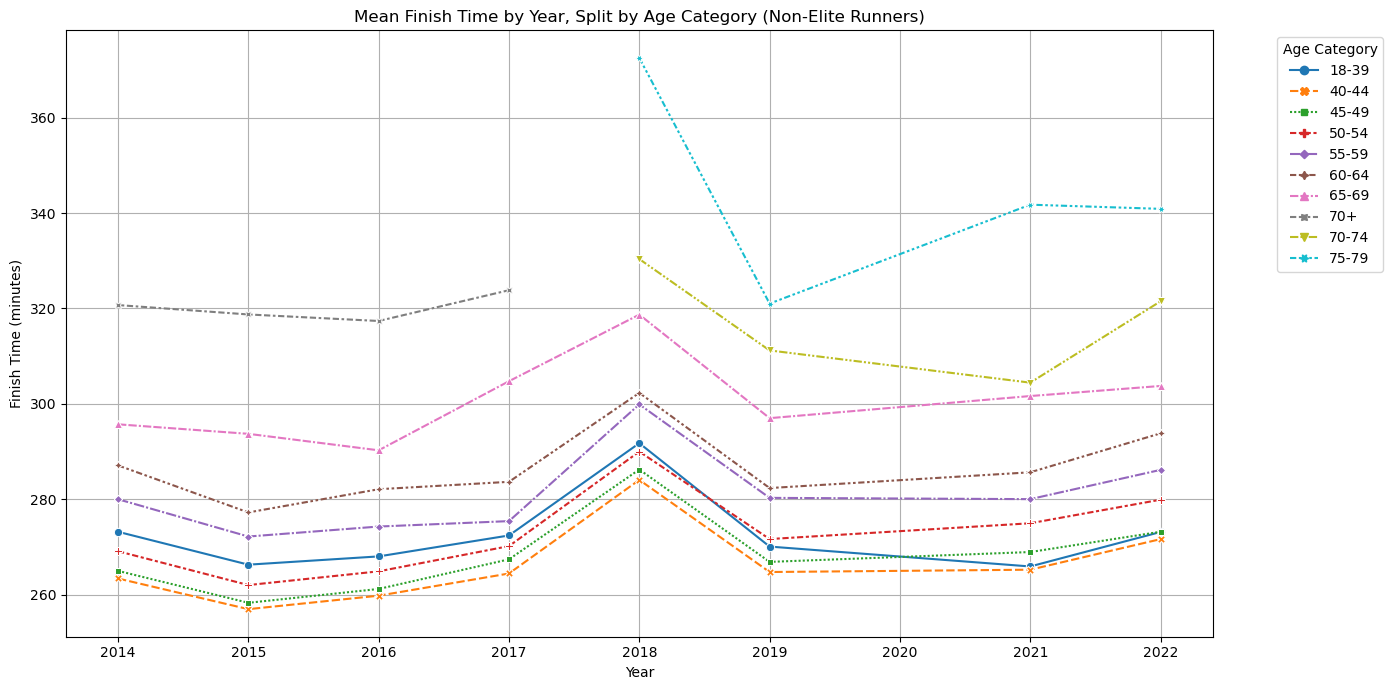

In [856]:
plt.figure(figsize=(14, 7))

sns.lineplot(
    data=age_stats,
    x="Year",
    y="mean_minutes",
    hue="Category",
    style="Category",
    markers=True
)

plt.title("Mean Finish Time by Year, Split by Age Category (Non-Elite Runners)")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Year")
plt.legend(title="Age Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


## Find Top-Improving Age Categories
### Bar plotting the improvement over time for all runners

When looking into the comparison of the average improvement per age category over time  
when using 2014-2016 and 2021-2022 as the comparison, it shows that all but the youngest runners were slower.

In [858]:
# Step 1: Group and calculate average finish time per year & category
avg_times = df_filtered.groupby(["Year", "Category"])["Finish Time"].mean().reset_index()

# Step 2: Convert to minutes
avg_times["mean_minutes"] = avg_times["Finish Time"].dt.total_seconds() / 60

# Step 3: Filter for just the years of interest
relevant_years = [2014, 2015, 2016, 2017, 2019, 2021, 2022]
avg_times = avg_times[avg_times["Year"].isin(relevant_years)]

# Step 4: Pivot table: categories as rows, years as columns
pivot_table = avg_times.pivot(index="Category", columns="Year", values="mean_minutes")

# Step 5: Calculate average across early and recent years
pivot_table["Early Avg (2014–2019)"] = pivot_table[[2014, 2015, 2016, 2017, 2019]].mean(axis=1)
pivot_table["Recent Avg (2021–2022)"] = pivot_table[[2021, 2022]].mean(axis=1)

# Step 6: Calculate change (recent - early)
pivot_table["Change (Recent - Early)"] = pivot_table["Recent Avg (2021–2022)"] - pivot_table["Early Avg (2014–2019)"]

# Step 7: Sort by biggest improvement (most negative change)
improvements = pivot_table["Change (Recent - Early)"].sort_values()

# Show results
print("📉 Categories with best improvement from early years to recent years:")
print(improvements)


📉 Categories with best improvement from early years to recent years:
Category
18-39    -0.469307
70-74     1.770865
65-69     6.409861
40-44     6.575999
55-59     6.658808
60-64     7.251168
45-49     7.313546
50-54     9.875005
75-79    20.306953
70+            NaN
Name: Change (Recent - Early), dtype: float64


In [860]:
# Drop any rows with NaN (missing change values)
improvements_clean = improvements.dropna()


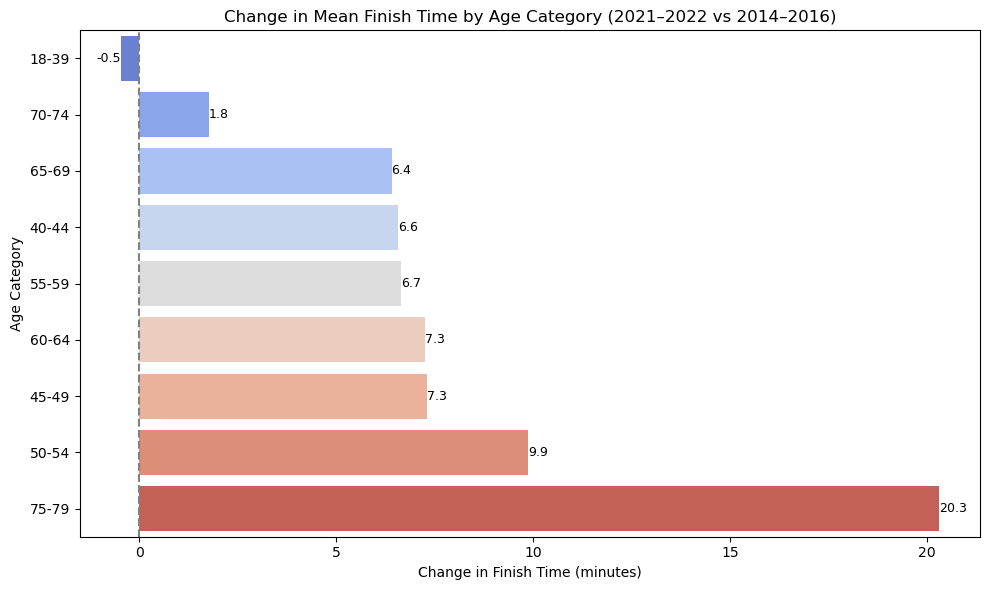

In [862]:
plt.figure(figsize=(10, 6))

# Create the barplot object
ax = sns.barplot(
    x=improvements_clean.values,
    y=improvements_clean.index,
    palette="coolwarm"
)

# Add value labels to the bars
for i, value in enumerate(improvements_clean.values):
    ax.text(
        value,
        i,
        f"{value:.1f}",
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=9,
        color='black'
    )

plt.title("Change in Mean Finish Time by Age Category (2021–2022 vs 2014–2016)")
plt.xlabel("Change in Finish Time (minutes)")
plt.ylabel("Age Category")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


#### How to read it

Bar Direction | What it Means

⬅️ Left of 0 (negative value) | The age group got faster in recent years (improvement!)

➡️ Right of 0 (positive value) | The age group got slower in recent years

### Bar plotting the improvement over time for the top 15% of each age category

The results from the previous barplot prompted the idea to filter out the slowest runners so that any outliers  
(i.e higher numbers of slower runners in some years) were not affecting the results too negatively.
  
When using r the top 15% of runners in each age catego, it s shows an improvement in average finish time for the majority of the age categori
s


In [870]:
# Drop NaNs in the Change column (i.e., categories missing data in early or recent years)
pivot_30 = pivot_30.dropna(subset=["Change (Recent - Early)"])

In [878]:
# Convert Finish Time to minutes (if not done already)
df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60

# Drop missing age categories
df_top_30 = df_filtered[df_filtered["Category"].notna()].copy()

# Rank runners within Year + Category
df_top_30["Rank"] = df_top_30.groupby(["Year", "Category"])["Finish_Minutes"].rank(method="first")

# Get group sizes
df_top_30["Group_Size"] = df_top_30.groupby(["Year", "Category"])["Finish_Minutes"].transform("count")

# Keep only top 30%
df_top_30 = df_top_30[df_top_30["Rank"] <= (df_top_30["Group_Size"] * 0.15)]

# Group and calculate average finish time for each Year + Category
avg_times_30 = df_top_30.groupby(["Year", "Category"])["Finish_Minutes"].mean().reset_index()

# Filter for years of interest
relevant_years = [2014, 2015, 2016, 2017, 2019, 2021, 2022]
avg_times_30 = avg_times_30[avg_times_30["Year"].isin(relevant_years)]

# Pivot
pivot_30 = avg_times_30.pivot(index="Category", columns="Year", values="Finish_Minutes")

# Calculate early & recent averages
pivot_30["Early Avg (2014–2019)"] = pivot_30[[2014, 2015, 2016, 2017, 2019]].mean(axis=1)
pivot_30["Recent Avg (2021–2022)"] = pivot_30[[2021, 2022]].mean(axis=1)

# Calculate improvement
pivot_30["Change (Recent - Early)"] = pivot_30["Recent Avg (2021–2022)"] - pivot_30["Early Avg (2014–2019)"]

# Drop categories with NaN in the change calculation
pivot_30 = pivot_30.dropna(subset=["Change (Recent - Early)"])

# Sort
improvements_30 = pivot_30["Change (Recent - Early)"].sort_values()

# View results
print("📉 Top 30% Finish Time Change by Age Category:")
print(improvements_30)


📉 Top 30% Finish Time Change by Age Category:
Category
70-74   -5.450726
60-64   -3.561816
18-39   -2.206348
40-44   -1.912860
45-49   -0.394802
55-59   -0.359509
50-54    1.964561
65-69    2.465342
75-79    7.317593
Name: Change (Recent - Early), dtype: float64


/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/3776888812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60


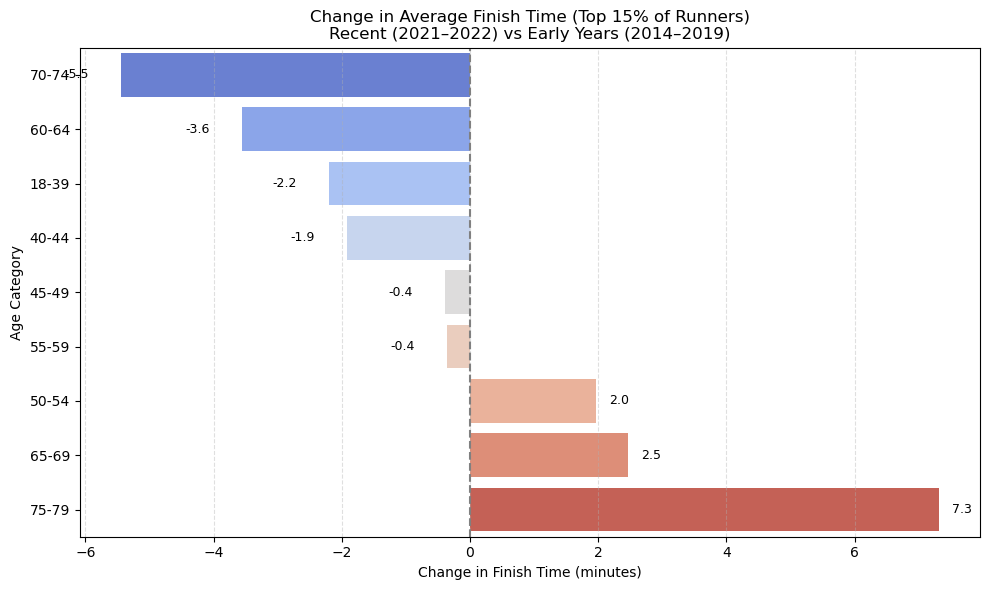

In [880]:
# Prepare DataFrame
improvements_30_df = improvements_30.reset_index()
improvements_30_df.columns = ["Category", "Change"]

# Plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=improvements_30_df,
    x="Change",
    y="Category",
    palette="coolwarm",
    orient="h"
)

# Add labels
for index, row in improvements_30_df.iterrows():
    plt.text(
        row["Change"] + 0.2 if row["Change"] > 0 else row["Change"] - 0.5,
        index,
        f"{row['Change']:.1f}",
        va="center",
        ha="right" if row["Change"] < 0 else "left",
        fontsize=9
    )

plt.title("Change in Average Finish Time (Top 15% of Runners)\nRecent (2021–2022) vs Early Years (2014–2019)")
plt.xlabel("Change in Finish Time (minutes)")
plt.ylabel("Age Category")
plt.axvline(0, color="gray", linestyle="--")
plt.grid(True, axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


## Plot % of Sub-5-Hour Finishers by Year

When filtering and segmenting the runners to who finished in under 5, 4 and 3 hours, we see that the average finish time remains similar throughout the years.

In [890]:
# Safely add flags using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, "Under_3h30"] = df_filtered["Finish Time"] < pd.to_timedelta("3:30:00")
df_filtered.loc[:, "Under_4h00"] = df_filtered["Finish Time"] < pd.to_timedelta("4:00:00")
df_filtered.loc[:, "Under_5h00"] = df_filtered["Finish Time"] < pd.to_timedelta("5:00:00")


/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/3597121137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, "Under_3h30"] = df_filtered["Finish Time"] < pd.to_timedelta("3:30:00")
/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/3597121137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, "Under_4h00"] = df_filtered["Finish Time"] < pd.to_timedelta("4:00:00")
/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/359712113

In [892]:
# Group by year and calculate proportion under each threshold
threshold_stats = df_filtered.groupby("Year")[["Under_3h30", "Under_4h00", "Under_5h00"]].mean().reset_index()

# Convert to percentages
threshold_stats *= 100


In [894]:
# Melt to long format for Seaborn
threshold_melted = threshold_stats.melt(id_vars="Year", var_name="Threshold", value_name="Percent")


In [896]:
# Check unique year values
print(threshold_melted["Year"].unique())


[201400 201500 201600 201700 201800 201900 202100 202200]


In [898]:
# Truncate long string years to the first 4 digits
threshold_melted["Year"] = threshold_melted["Year"].astype(str).str[:4].astype(int)


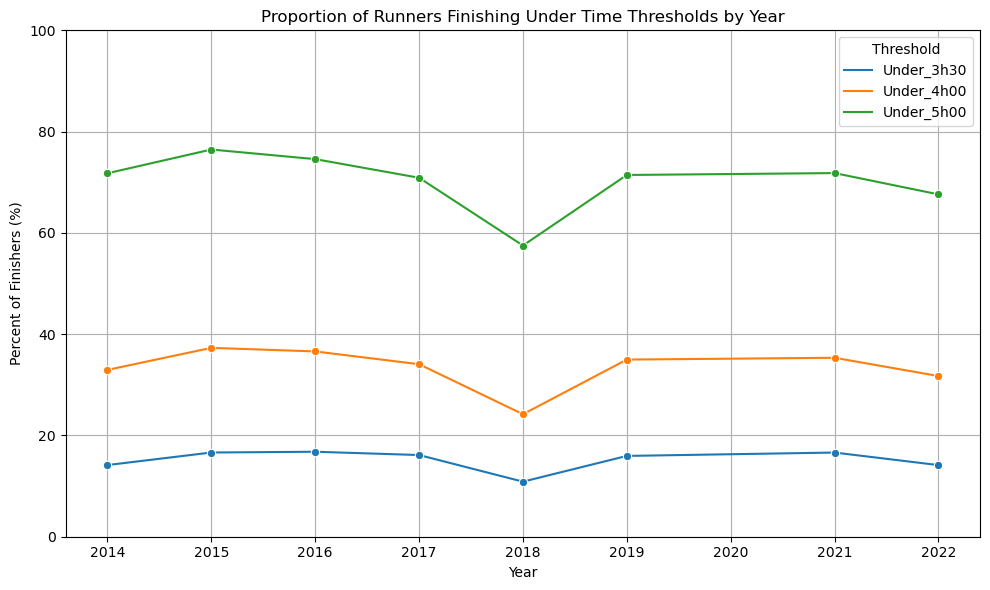

In [900]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=threshold_melted,
    x="Year",
    y="Percent",
    hue="Threshold",
    marker="o"
)

plt.title("Proportion of Runners Finishing Under Time Thresholds by Year")
plt.ylabel("Percent of Finishers (%)")
plt.xlabel("Year")
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


## Top 1000 Runners Average Finish Time

When filtering to the faster runners we really start to see an improvement over time.  

This is a great example of how the fastest 1000 runners per marathon are bringing that average finish time down over the years

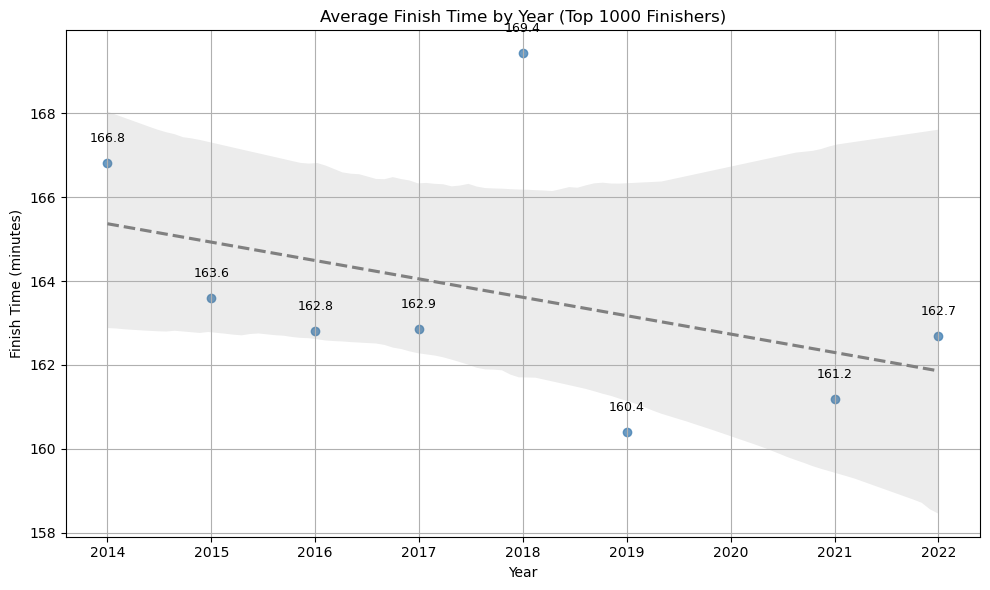

In [905]:
plt.figure(figsize=(10, 6))

# Plot trend line and dots
sns.regplot(
    data=avg_finish_by_year,
    x="Year",
    y="Finish_Minutes",
    marker="o",
    color="steelblue",
    line_kws={"color": "gray", "linestyle": "--"}
)

# Add labels for each point
for _, row in avg_finish_by_year.iterrows():
    plt.text(
        row["Year"],
        row["Finish_Minutes"] + 0.5,
        f"{row['Finish_Minutes']:.1f}",
        ha="center",
        fontsize=9
    )

# Final styling
plt.title("Average Finish Time by Year (Top 1000 Finishers)")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


## Men vs Women Finish Time Improvements

Using the top 500 men and top 500 women from each marathon  
This shows a similar trend in improvement for both genders with around 4-5 minutes of improvement

In [935]:
# Sort by Year, Gender, and Finish Time
df_sorted = df_filtered.sort_values(by=["Year", "Gender", "Finish Time"]).copy()

# Rank runners within each year & gender
df_sorted["Gender_Rank"] = df_sorted.groupby(["Year", "Gender"])["Finish Time"].rank(method="first")

# Keep only top 500 per gender per year
top_500_each = df_sorted[df_sorted["Gender_Rank"] <= 500]


In [937]:
# Safely convert Finish Time to minutes
top_500_each.loc[:, "Finish_Minutes"] = top_500_each["Finish Time"].dt.total_seconds() / 60

# Group by Year and Gender to calculate average finish time
avg_finish_by_year_gender = top_500_each.groupby(["Year", "Gender"])["Finish_Minutes"].mean().reset_index()


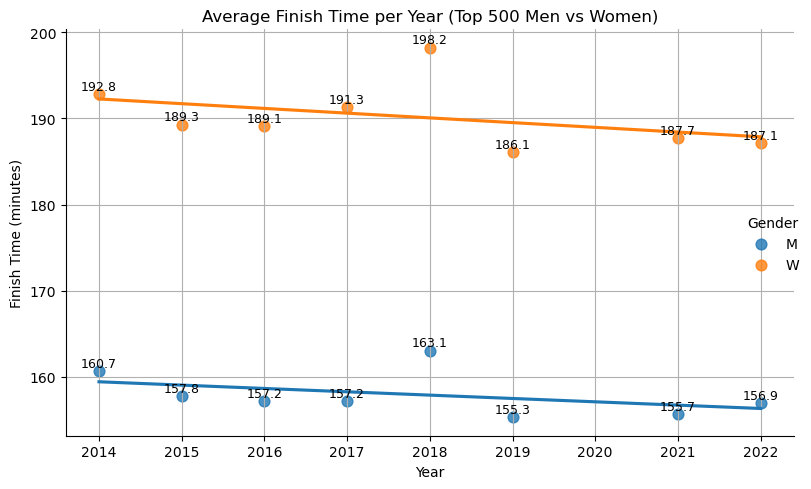

In [939]:
# Use lmplot to include trend lines by gender
plot = sns.lmplot(
    data=avg_finish_by_year_gender,
    x="Year",
    y="Finish_Minutes",
    hue="Gender",
    markers="o",
    aspect=1.5,
    ci=None,  # No confidence interval for a cleaner plot
    scatter_kws={"s": 60}  # marker size
)

# Add data labels to each point
ax = plot.axes[0, 0]
for _, row in avg_finish_by_year_gender.iterrows():
    ax.text(
        row["Year"],
        row["Finish_Minutes"] + 0.5,
        f"{row['Finish_Minutes']:.1f}",
        ha="center",
        fontsize=9
    )

# Titles and formatting
ax.set_title("Average Finish Time per Year (Top 500 Men vs Women)")
ax.set_ylabel("Finish Time (minutes)")
ax.set_xlabel("Year")
ax.grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()


## Top 1000 vs the Average Runner

This visual enforces the theory that the faster runners are getting even faster over the years when compared the average of all runners

In [945]:
# Top 1000 finishers per year (no gender split)
df_top = df_filtered.sort_values(by=["Year", "Finish Time"]).copy()
df_top["Rank"] = df_top.groupby("Year")["Finish Time"].rank(method="first")
df_top_1000 = df_top[df_top["Rank"] <= 1000]

# Group and calculate mean finish time in minutes
top_avg = df_top_1000.groupby("Year")["Finish Time"].mean().reset_index()
top_avg["Group"] = "Top 1000"
top_avg["Finish Time (min)"] = top_avg["Finish Time"].dt.total_seconds() / 60

all_avg = df_filtered.groupby("Year")["Finish Time"].mean().reset_index()
all_avg["Group"] = "All Runners"
all_avg["Finish Time (min)"] = all_avg["Finish Time"].dt.total_seconds() / 60

# Combine both
combined_avg = pd.concat([top_avg, all_avg], ignore_index=True)


In [947]:
# Pivot for easier calculation
pivot = combined_avg.pivot(index="Group", columns="Year", values="Finish Time (min)")

# Calculate % improvement
pivot["% Improvement"] = ((pivot[2014] - pivot[2022]) / pivot[2014]) * 100
print(pivot["% Improvement"])


Group
All Runners   -1.862986
Top 1000       2.468704
Name: % Improvement, dtype: float64


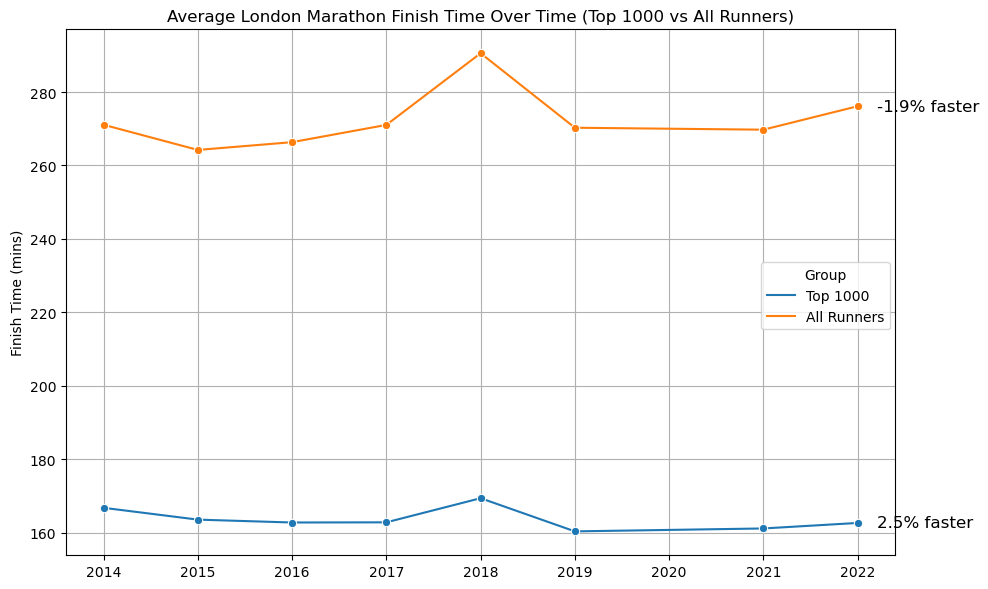

In [949]:
plt.figure(figsize=(10, 6))

# Lineplot without gender split
sns.lineplot(
    data=combined_avg,
    x="Year",
    y="Finish Time (min)",
    hue="Group",
    marker="o"
)

# Add % improvement label at 2022
for group in combined_avg["Group"].unique():
    latest_value = combined_avg[(combined_avg["Year"] == 2022) & (combined_avg["Group"] == group)]["Finish Time (min)"].values[0]
    improvement = pivot.loc[group, "% Improvement"]
    plt.text(
        x=2022 + 0.2,
        y=latest_value,
        s=f"{improvement:.1f}% faster",
        va="center",
        fontsize=12
    )

# 🗝️ Manually adjust legend position here
plt.legend(
    title="Group",
    bbox_to_anchor=(0.83, 0.57),  # Right outside plot
    loc='upper left'           # Anchor corner of legend box
)

plt.title("Average London Marathon Finish Time Over Time (Top 1000 vs All Runners)")
plt.ylabel("Finish Time (mins)")
plt.xlabel("")
plt.grid(True)
plt.tight_layout()
plt.show()


## Top 23,000 runners

Analysis was carried out to find the average number of runners that were likely to help improve the average finish time year on year. 
 
The top 23,000 runners in each marathon is the magic number where the trend line goes flat.  

Therefore if we filter to a lower number the trend line will slope down showing improvement, and vice versa.  


If the hot 2018 marathon didn’t cause so many slower result,s this figure would even highe. 


In [952]:
# Step 1: Sort and rank runners by Year + Finish Time (ignore "top500" as this was the original use case before updating to 23000)
df_top500 = df_filtered.sort_values(by=["Year", "Finish Time"]).copy()
df_top500["Rank"] = df_top500.groupby("Year")["Finish Time"].rank(method="first")

# Step 2: Keep only the top 23000 finishers per year
df_top500 = df_top500[df_top500["Rank"] <= 23000]


In [954]:
top500_avg = df_top500.groupby("Year")["Finish Time"].mean().reset_index()
top500_avg["Finish Time (min)"] = top500_avg["Finish Time"].dt.total_seconds() / 60


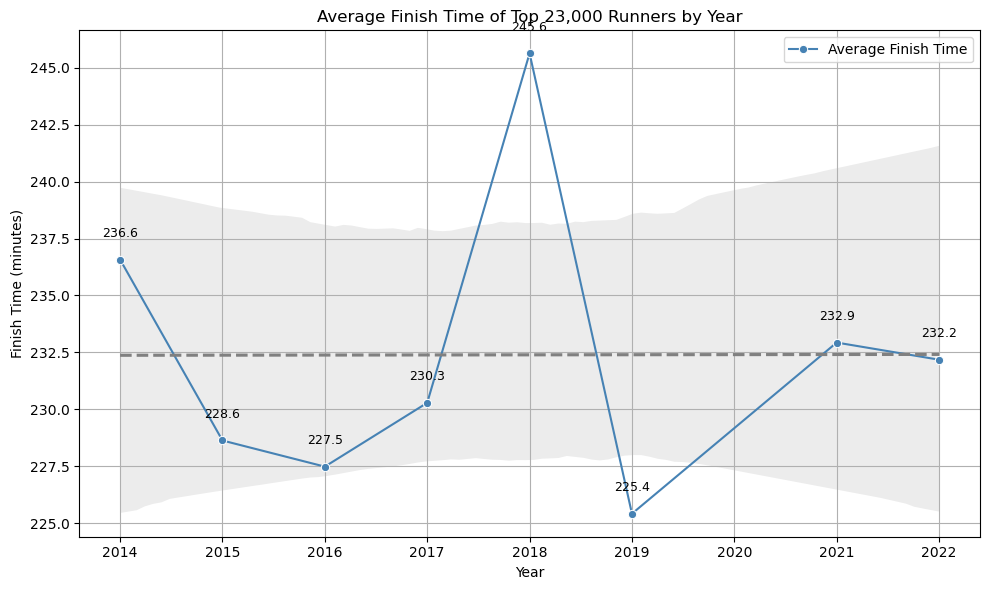

In [956]:
plt.figure(figsize=(10, 6))

# Plot actual average finish times
sns.lineplot(
    data=top500_avg,
    x="Year",
    y="Finish Time (min)",
    marker="o",
    label="Average Finish Time",
    color="steelblue"
)

# Add regression trend line
sns.regplot(
    data=top500_avg,
    x="Year",
    y="Finish Time (min)",
    scatter=False,
    color="gray",
    line_kws={"linestyle": "dashed", "label": "Trend Line"}
)

# Add data labels
for i, row in top500_avg.iterrows():
    plt.text(
        row["Year"],
        row["Finish Time (min)"] + 1,  # Slightly above the point
        f"{row['Finish Time (min)']:.1f}",
        ha="center",
        fontsize=9
    )

# Final styling
plt.title("Average Finish Time of Top 23,000 Runners by Year")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Club Vs Non Club Runners

The analysis shows it may help to join a running club if you want to improve your speed!

In [960]:
# If 'Club' is missing or blank, label as Non-Affiliated
df_filtered["Club Affiliated"] = df_filtered["Club"].apply(
    lambda x: "Yes" if pd.notnull(x) and str(x).strip() != "" else "No"
)

/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/1148695683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Club Affiliated"] = df_filtered["Club"].apply(


In [962]:
# Make sure Finish Time is in minutes
df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60

# Mean finish time by affiliation
club_stats = df_filtered.groupby("Club Affiliated")["Finish_Minutes"].mean().reset_index()
print(club_stats)


  Club Affiliated  Finish_Minutes
0              No      281.125975
1             Yes      254.760732


/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/942774504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60


In [964]:
from scipy.stats import ttest_ind

club_yes = df_filtered[df_filtered["Club Affiliated"] == "Yes"]["Finish_Minutes"]
club_no = df_filtered[df_filtered["Club Affiliated"] == "No"]["Finish_Minutes"]

t_stat, p_val = ttest_ind(club_yes.dropna(), club_no.dropna(), equal_var=False)

print(f"\nT-test (Club vs Non-Club): t = {t_stat:.2f}, p = {p_val:.5f}")



T-test (Club vs Non-Club): t = -114.46, p = 0.00000


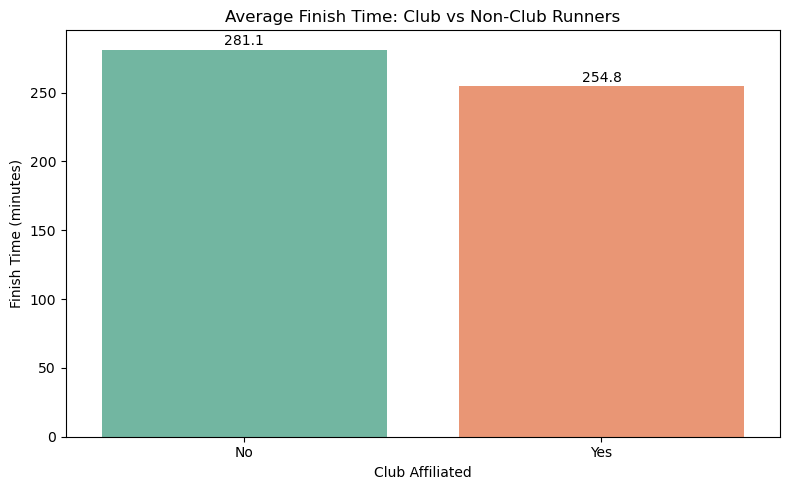

In [966]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=club_stats, x="Club Affiliated", y="Finish_Minutes", palette="Set2")

# Add labels on top of bars
for i, row in club_stats.iterrows():
    ax.text(
        x=i,
        y=row["Finish_Minutes"] + 1,  # Slightly above the bar
        s=f"{row['Finish_Minutes']:.1f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Average Finish Time: Club vs Non-Club Runners")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Club Affiliated")
plt.tight_layout()
plt.show()


## Pacing Efficiency

The below shows that pacing efficiency has neither improved or worsened significantly over the years

In [969]:
df_filtered["Pacing Ratio"] = df_filtered["Finish Time"] / (2 * df_filtered["Half Time"])

/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/1989879686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Pacing Ratio"] = df_filtered["Finish Time"] / (2 * df_filtered["Half Time"])


In [971]:
pacing_by_year = df_filtered.groupby("Year")["Pacing Ratio"].mean().reset_index()

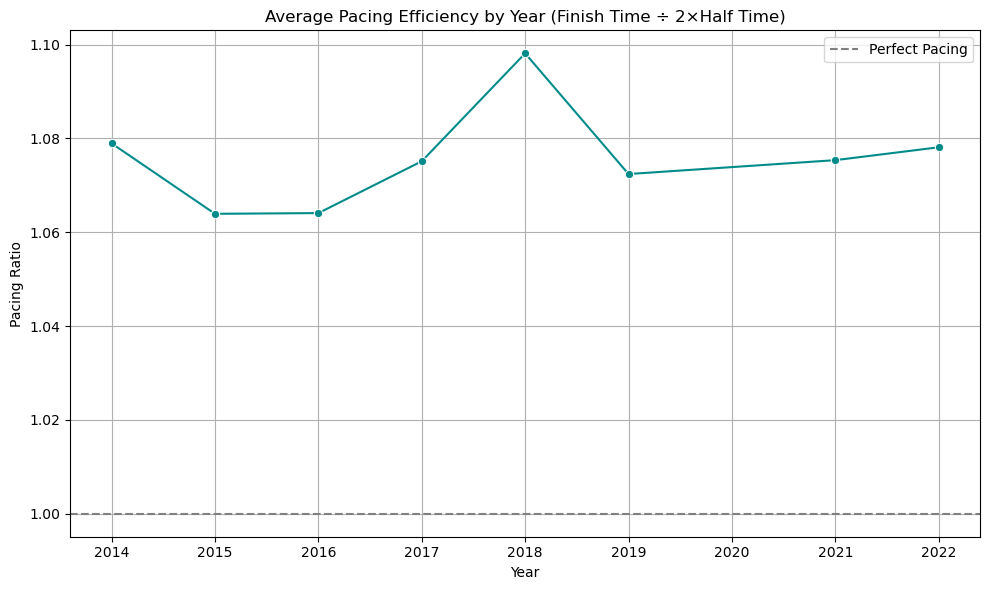

In [973]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=pacing_by_year, x="Year", y="Pacing Ratio", marker="o", color="darkcyan")

plt.axhline(1.0, linestyle="--", color="gray", label="Perfect Pacing")
plt.title("Average Pacing Efficiency by Year (Finish Time ÷ 2×Half Time)")
plt.ylabel("Pacing Ratio")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Women vs Men Second Half Performance

While researching for dataset’s, a repeating claim i spotted online, was that women are more evenly paced and perform better in the 2nd half of the race in comparison to their first half when comparing men in the same way. This was proven with the below analysis 

In [975]:
# First and second half times
df_filtered["First_Half_Minutes"] = df_filtered["Half Time"].dt.total_seconds() / 60
df_filtered["Second_Half_Minutes"] = (df_filtered["Finish Time"] - df_filtered["Half Time"]).dt.total_seconds() / 60

# Pacing Ratio = Second Half ÷ First Half
df_filtered["Pacing_Ratio"] = df_filtered["Second_Half_Minutes"] / df_filtered["First_Half_Minutes"]


/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/3899068456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["First_Half_Minutes"] = df_filtered["Half Time"].dt.total_seconds() / 60
/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/3899068456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Second_Half_Minutes"] = (df_filtered["Finish Time"] - df_filtered["Half Time"]).dt.total_seconds() / 60
/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipyke

In [977]:
pacing_by_gender = df_filtered.groupby("Gender")["Pacing_Ratio"].mean().reset_index()
print("Average Pacing Ratio (Second Half ÷ First Half):")
print(pacing_by_gender)


Average Pacing Ratio (Second Half ÷ First Half):
  Gender  Pacing_Ratio
0      M      1.163306
1      W      1.134106


In [979]:
from scipy.stats import ttest_ind

men_ratio = df_filtered[df_filtered["Gender"] == "M"]["Pacing_Ratio"]
women_ratio = df_filtered[df_filtered["Gender"] == "F"]["Pacing_Ratio"]

t_stat, p_val = ttest_ind(men_ratio.dropna(), women_ratio.dropna(), equal_var=False)

print(f"\nT-test (Pacing Ratio M vs F): t = {t_stat:.2f}, p = {p_val:.5f}")



T-test (Pacing Ratio M vs F): t = nan, p = nan


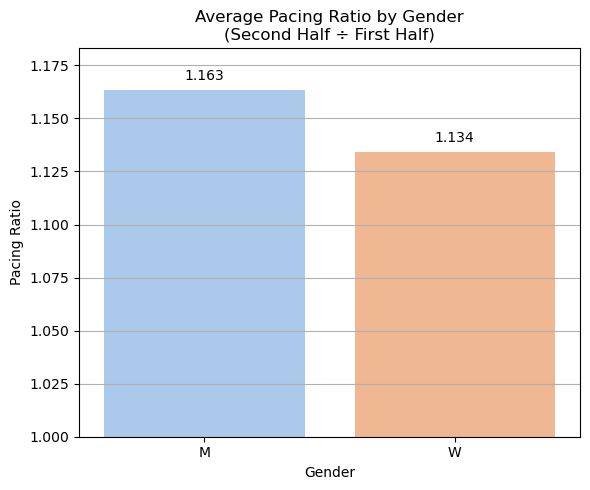

In [981]:
# Calculate mean pacing ratio by gender
pacing_by_gender = df_filtered.groupby("Gender")["Pacing_Ratio"].mean().reset_index()

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(data=pacing_by_gender, x="Gender", y="Pacing_Ratio", palette="pastel")

# Annotate bars with values
for i, row in pacing_by_gender.iterrows():
    plt.text(i, row["Pacing_Ratio"] + 0.005, f"{row['Pacing_Ratio']:.3f}", ha='center', fontsize=10)

plt.title("Average Pacing Ratio by Gender\n(Second Half ÷ First Half)")
plt.ylabel("Pacing Ratio")
plt.ylim(1.0, pacing_by_gender["Pacing_Ratio"].max() + 0.02)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Finish time by age category

Finally, a visual to show that the younger age groups achieve faster times was generated.  

It also highlights that there is a big variance in finish times for the younger age group.  

This is why it’d be great to gather more defined ages in future data sets.

/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/3426199988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60


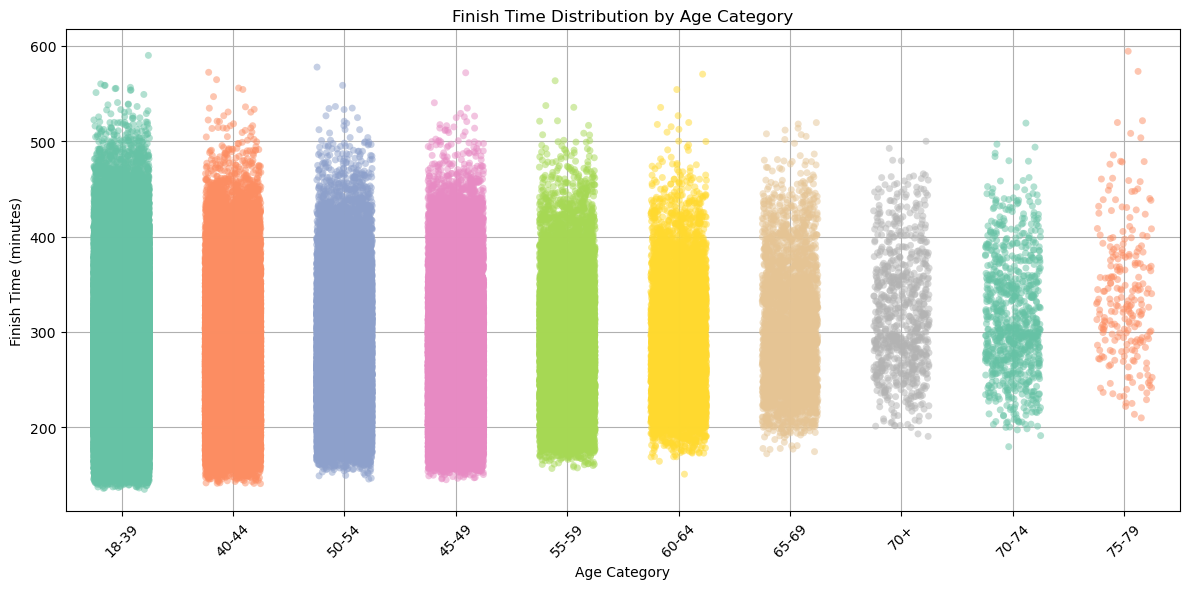

In [985]:
# Step 1: Convert Finish Time to minutes
df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60

# Step 2: Filter out NaNs and outliers
df_scatter = df_filtered[
    (df_filtered["Finish_Minutes"] < 600) & 
    (df_filtered["Category"].notna())
].copy()

# Step 3: Plot
plt.figure(figsize=(12, 6))

sns.stripplot(
    data=df_scatter,
    x="Category",
    y="Finish_Minutes",
    jitter=0.25,
    alpha=0.5,
    palette="Set2"
)

plt.title("Finish Time Distribution by Age Category")
plt.ylabel("Finish Time (minutes)")
plt.xlabel("Age Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [986]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60

model = ols('Finish_Minutes ~ C(Gender) + C(Year) + C(Gender):C(Year)', data=df_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


/var/folders/fy/cjp044211b53s6jpbslp5gbw0000gn/T/ipykernel_56061/1734851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Finish_Minutes"] = df_filtered["Finish Time"].dt.total_seconds() / 60


                         sum_sq        df             F        PR(>F)
C(Gender)          9.418139e+07       1.0  28395.419793  0.000000e+00
C(Year)            1.709035e+07       7.0    736.098775  0.000000e+00
C(Gender):C(Year)  1.357053e+05       7.0      5.844967  8.415540e-07
Residual           1.030776e+09  310776.0           NaN           NaN


## Future analysis & improving the datasets

Using future marathon data, as well as data from other marathons, will help provide a more accurate picture of average finish times overall and by age group/gender.

Analysing elite running datasets available on Kaggle may also provide deeper insights, as these runners often follow optimal nutrition plans and use advanced gear — potentially showing more consistent signs of improvement over time.

Including new columns of data could help uncover deeper insights and be useful for predicting finish times or marketing products to runners. Examples include:

  - **Date of Birth** (instead of age group): Allows detailed insight into peak performance ages and when pace starts to decline. Also helps calculate the average participant age per marathon, which may explain slower years.
  
  - **Nationality**: Identify which countries produce faster runners.
  
  - **Weather**: Assess how temperature, rain, or wind affects finishing times. Could help runners prepare better.
  
  - **Trainers**: Reveal if specific brands or models are associated with better performance.
  
  - **Nutrition**: Track dietary choices (e.g. vegetarian, vegan, carb-heavy) and their impact on performance.
  
  - **Average mileage per week**: Useful for predicting finish time potential.
  
  - **Number of runs per week**: A basic training volume metric.
  
  - **Weight**: Can influence pacing and endurance.
  
  - **Fancy dress**: Yes/No — may impact time due to costume constraints.
  
  - **Unique runner identifiers**: Enables tracking of individual improvement over multiple marathons — more accurate than broad group comparisons.
the top % of runners.
